In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

[array([[171, 180, 186, ..., 220, 213, 207],
       [172, 179, 186, ..., 220, 215, 211],
       [171, 179, 181, ..., 219, 217, 215],
       ...,
       [133, 137, 140, ...,   5,   4,   4],
       [129, 133, 136, ...,   3,   3,   3],
       [126, 130, 134, ...,   2,   2,   2]], dtype=uint8), 0]


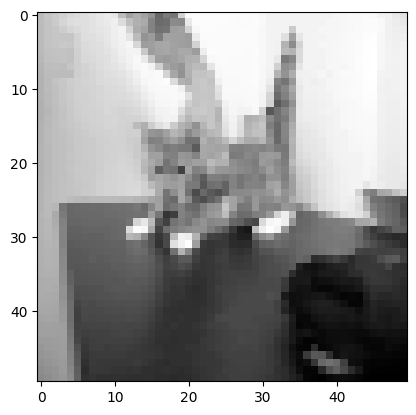

In [2]:
import pickle

# Load the list
with open('training_data.pkl', 'rb') as f:
    x = pickle.load(f)
print(x[0])
plt.imshow(x[0][0],cmap='gray')

In [3]:
images = np.array([item[0] for item in x])
labels = np.array([item[1] for item in x])
# 0 cat , 1 dog

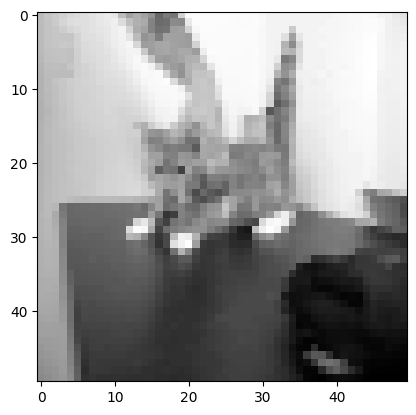

In [4]:
# Normalize images
images = images/255.0
images = images.reshape(-1,50,50,1)
plt.imshow(images[0],cmap='gray')

In [5]:
from sklearn.model_selection import train_test_split

train_imag,test_imag = train_test_split(images,train_size=0.2,random_state=10)

train_labels,test_labels = train_test_split(labels,train_size=0.2,random_state=10)
print('training shape',train_imag.shape)
print('test image shape',test_imag.shape)

training shape (4989, 50, 50, 1)
test image shape (19957, 50, 50, 1)


In [6]:
# CNN = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (1, 1), activation='relu',input_shape=(50,50,1),padding="valid"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding="valid"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding="valid"),
#     tf.keras.layers.MaxPool2D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dense(2,activation='softmax')
# ])
CNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(50,50,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# CNN.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,313 (2.03 MB)

 Trainable params: 533,313 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
try:
    history = CNN.fit(test_imag,test_labels,validation_data=(train_imag,train_labels),epochs=2,batch_size=32)
except Exception as e:
    print(f"CNN.fit() failed: {e.args[0]}")

Epoch 1/2
624/624 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8021 - loss: 0.4324 - val_accuracy: 0.7833 - val_loss: 0.4801
Epoch 2/2
624/624 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8163 - loss: 0.4074 - val_accuracy: 0.7895 - val_loss: 0.4640


In [16]:
mets = CNN.evaluate(images,labels)
mets

780/780 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8093 - loss: 0.4273


[0.38856804370880127, 0.8275876045227051]

IMAGE SHAPE: (50, 50, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.91905373]]
Prediction: Dog


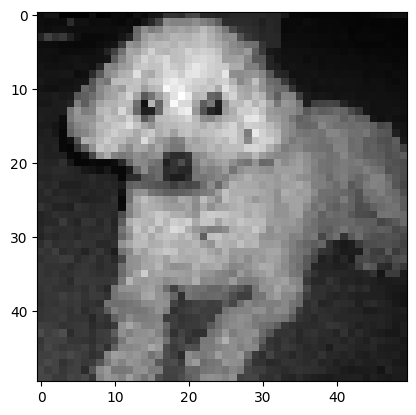

In [17]:

try:
    eval_img = train_imag[1233]
    plt.imshow(eval_img, cmap='gray')
    print("IMAGE SHAPE:", eval_img.shape)
    
    # Add a batch dimension to the single image
    eval_img = np.expand_dims(eval_img, axis=0)
    
    y_pred = CNN.predict(eval_img)
    print(y_pred)
    
    if y_pred[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")
except Exception as e:
    print(e.args[0])


In [18]:
CNN.save('./CatsAndDogs.h5')